/Users/mathieu/Documents/Formation_IA/Projets_perso/projet_mnist_fashion/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.7690 - loss: 0.6609 - val_accuracy: 0.8585 - val_loss: 0.3929
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.8596 - loss: 0.3837 - val_accuracy: 0.8762 - val_loss: 0.3460
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8784 - loss: 0.3348 - val_accuracy: 0.8670 - val_loss: 0.3569
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 710us/step - accuracy: 0.8852 - loss: 0.3081 - val_accuracy: 0.8806 - val_loss: 0.3319
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.8910 - loss: 0.2962 - val_accuracy: 0.8809 - val_loss: 0.3368
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8965 - loss: 0.2791 - val_accuracy: 0.8735 - val_loss: 0.3491
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.9016 - loss: 0.2606 - val_accuracy: 0.8835 - val_loss: 0.3243
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9025 -

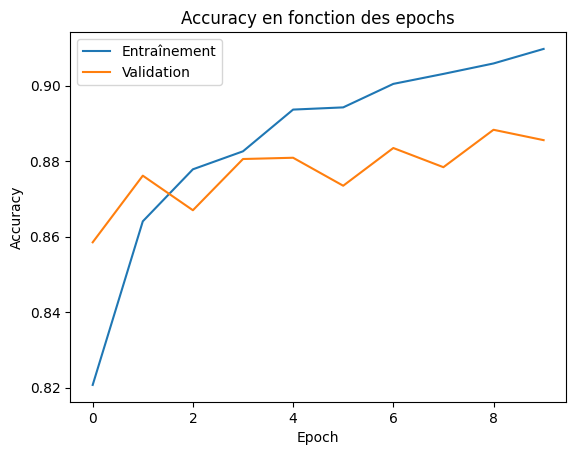

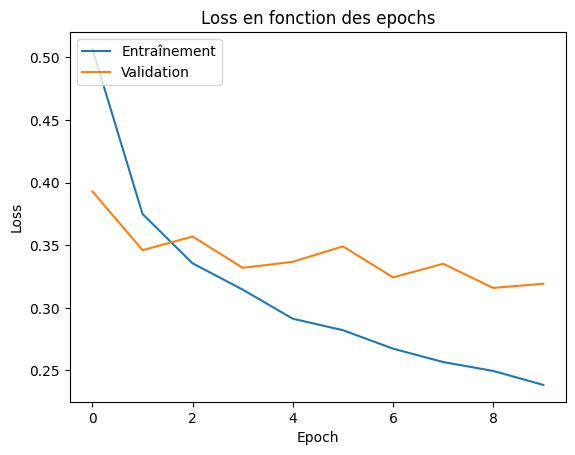

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.datasets import fashion_mnist

# Chargement du jeu de données
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplatissement des images (28x28 -> 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encoding des labels
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)

# Création du modèle
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss (test):", loss)
print("Accuracy (test):", accuracy)

# Visualisation de l'historique d'entraînement
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy en fonction des epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss en fonction des epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()